# Project Goal

Based on the Airbnb Seattle Open Data, this project aims to provide house owner an appropriate airbnb rent estimation.

All data come from https://www.kaggle.com/airbnb/seattle#listings.csv



Scope:
    - Data Preparation
    
    - Data Cleaning
    
    - Exploratary Visualization:
      - Host Analysis
      - Region Analysis
      - House Analysis
      
    - Feature Selection
    
    - Builidng Model:
      - Linear Regression
      - Random Forrest
     
    - Model Validation:
      - Linear Regression
      - Random Forrest
      - Comparation
      
    - A/B testing Experiment Design
      
    - Conclusion 
    

# 0.Data Preparation

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})
%matplotlib inline

In [7]:
data = pd.read_csv('seattle/listings.csv',parse_dates=['host_since'])
data.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


# 1.Exploratory Visualization

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

From them csv file, we can find we have 92 columns and 3818 entries.
According to the dataset description from data source, we will analyze the several virables:

# 1.0 Data Cleaning

In [50]:
# 1.Turn price string to float

def price(x):
    return float(x[1:].replace(",",""))

data['price'] = data['price'].apply(price)


TypeError: 'float' object is not subscriptable

2. Handling Missing Value 
we can see: weekly price and monthly price. reviews_per_month have too many missing values. Because this project is 
around the prediciton of daily price, thus delete these two values.
lisences, cleaning_fee, security deposit has too many missing values as well and has no obviously correlation
with our topic, thus will be deleted
square feet only have 97 values, too less.

# 1.1 Region Analysis

In [51]:
df_neighborhood_count = data.groupby("neighbourhood_group_cleansed").count().id.sort_values(ascending=False).to_frame().reset_index()
df_neighborhood_price = data.groupby("neighbourhood_group_cleansed").mean().price.sort_values(ascending=False).to_frame().reset_index()
data["price_per_tenant"] = data["price"] / data["beds"]
df_neighborhood_price_per_tenant = data.groupby("neighbourhood_group_cleansed").mean().price_per_tenant.sort_values(ascending=False).to_frame().reset_index()
df_neighborhood_price_per_tenant

,neighbourhood_group_cleansed,price_per_tenant
0,Downtown,103.301539
1,Interbay,102.909091
2,Cascade,102.086142
3,Queen Anne,96.848878
4,Capitol Hill,91.282321
5,Magnolia,89.441335
6,West Seattle,78.830167
7,Central Area,77.767397
8,Ballard,73.265704
9,Other neighborhoods,72.050772


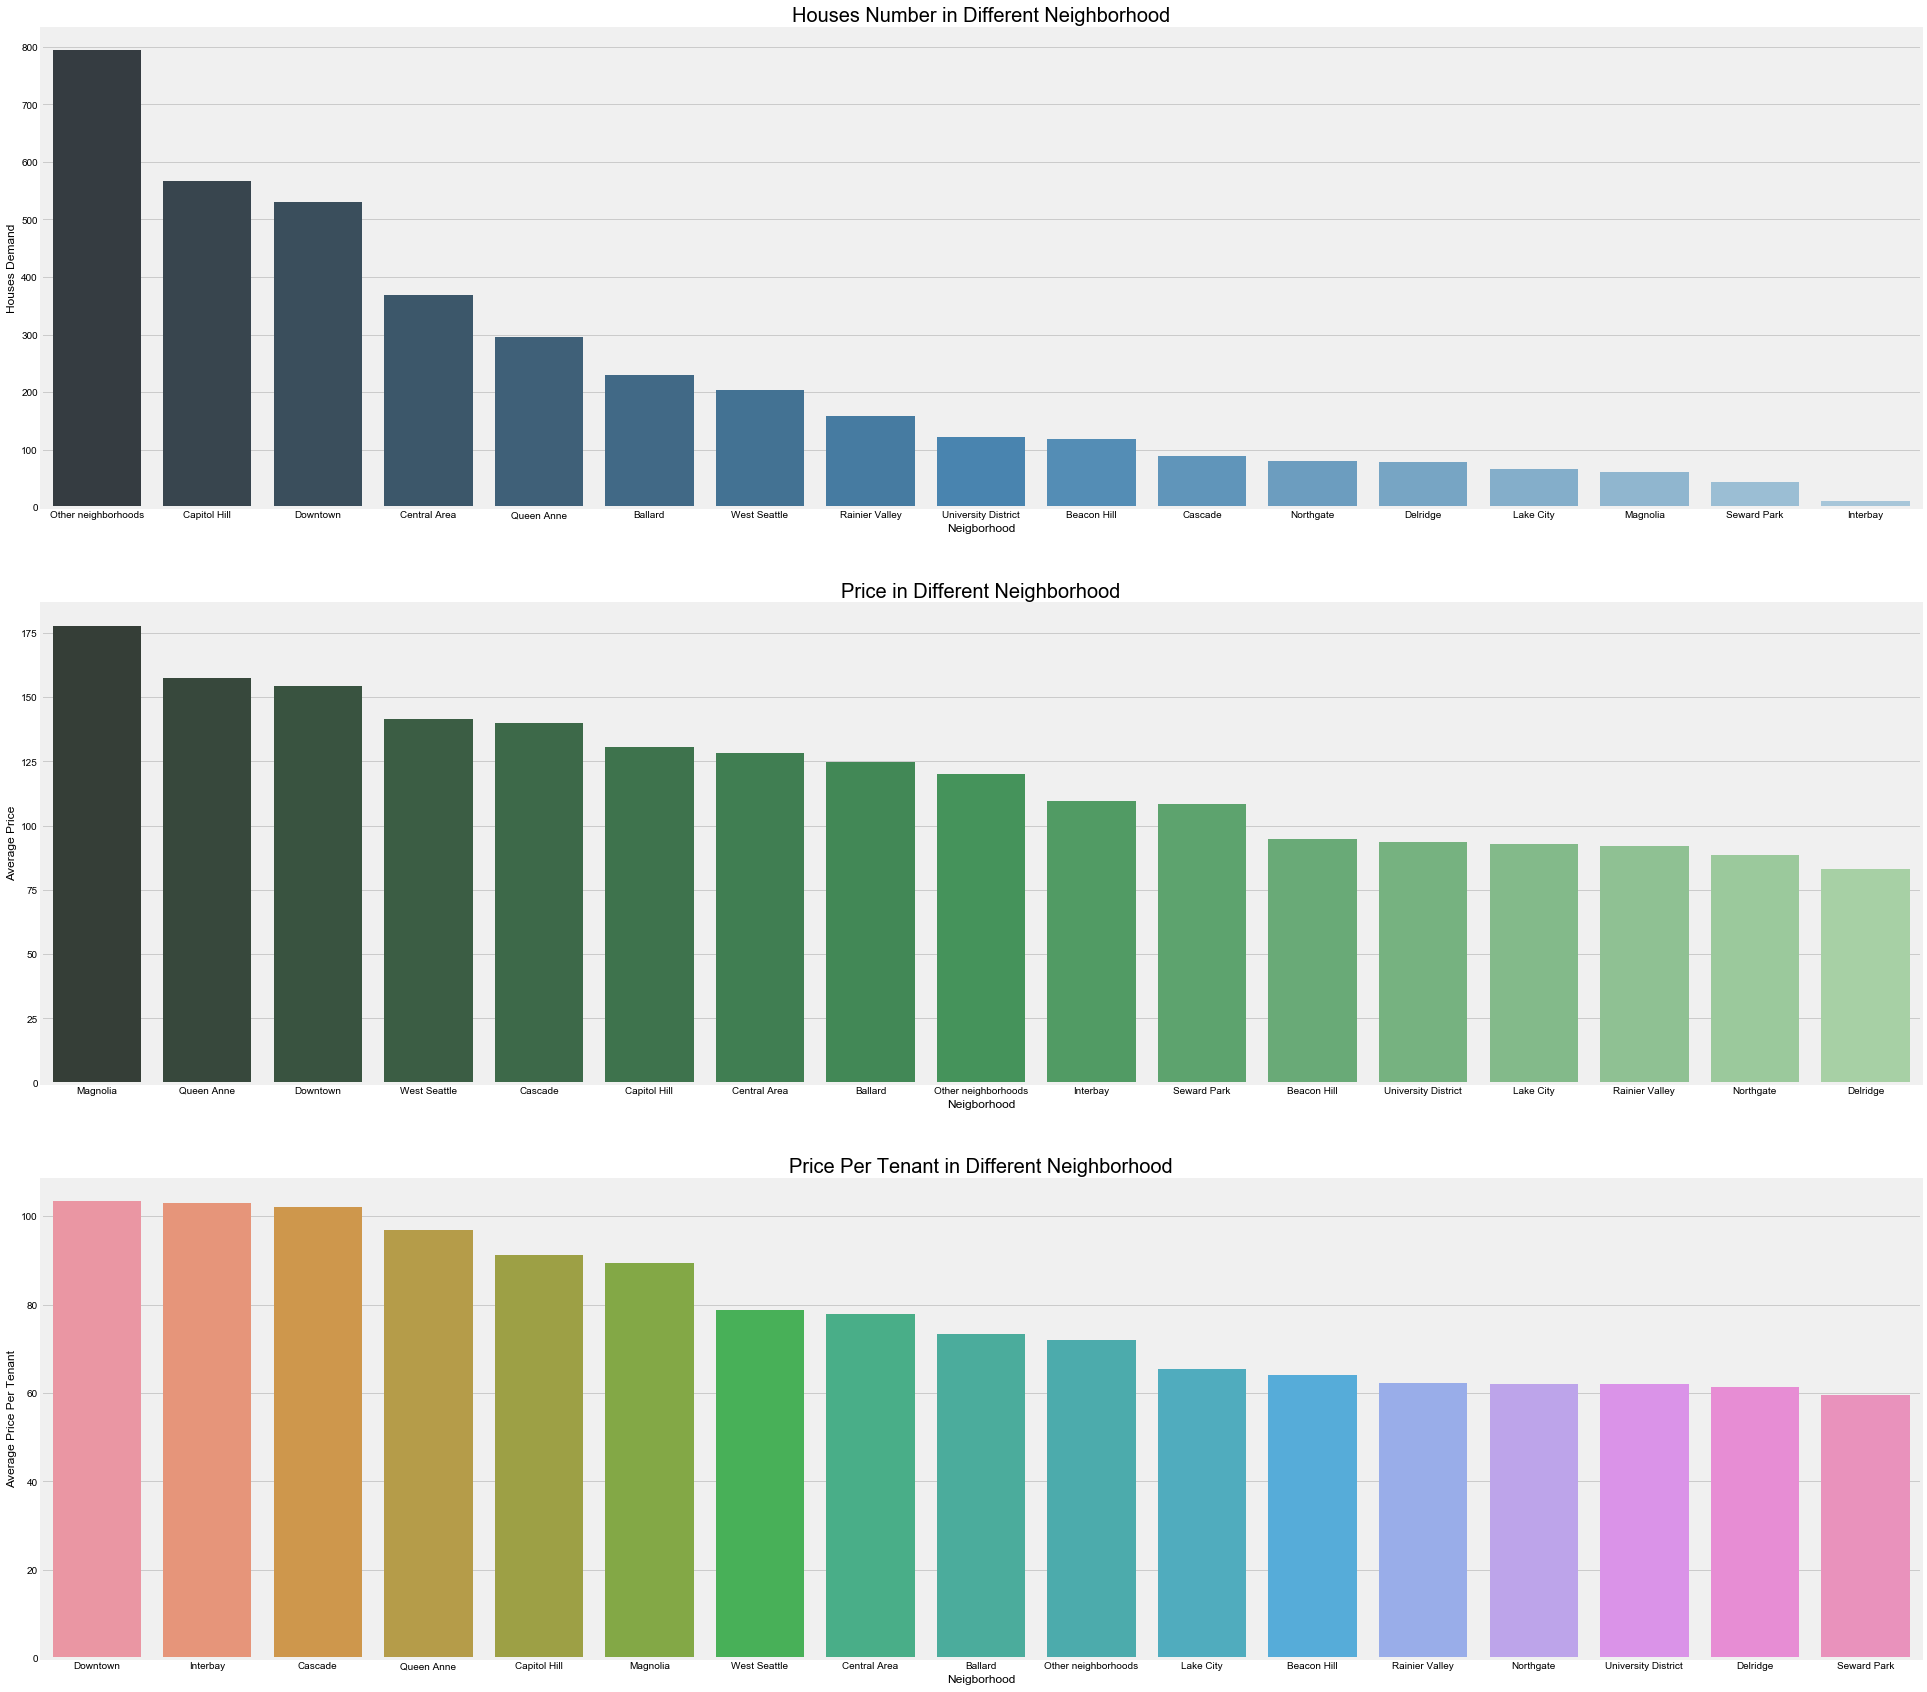

In [11]:
f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(30,30))
sns.barplot(x='neighbourhood_group_cleansed', y='id', palette="Blues_d", data=df_neighborhood_count, ax=ax1)
ax1.set_title('Houses Number in Different Neighborhood',fontsize=20)
ax1.set_xlabel('Neigborhood')
ax1.set_ylabel('Houses Demand')


sns.barplot(x='neighbourhood_group_cleansed', y='price', palette="Greens_d", data=df_neighborhood_price, ax=ax2)
ax2.set_title('Price in Different Neighborhood',fontsize=20)
ax2.set_xlabel('Neigborhood')
ax2.set_ylabel('Average Price')

sns.barplot(x='neighbourhood_group_cleansed', y="price_per_tenant",palette=None,data=df_neighborhood_price_per_tenant, ax=ax3)
ax3.set_title('Price Per Tenant in Different Neighborhood',fontsize=20)
ax3.set_xlabel('Neigborhood')
ax3.set_ylabel('Average Price Per Tenant')

plt.show()

Explaination:
    - Capital Hill, Downtown, Central Areas provide most of the Houses.
    - Magnolia, Queen Anne, Downtown are three areas where airbnb houses are.
    - Downtown, Interbay and Cascade are very expensive area for personal tenant.

# 1.2 House analysis

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


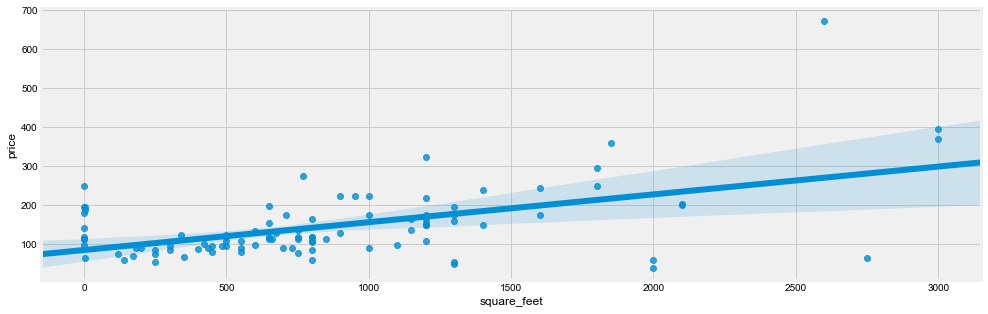

In [12]:
f, ax1= plt.subplots(1, 1, figsize=(15, 5))

sns.regplot(x='square_feet', y='price', data=data, ax=ax1)

plt.show()


# 1.3 Host analysis

In [13]:
# calculate how long have those hosts join airbnb platform
data["host_since"] = data["host_since"].apply(lambda x: 2019 - x.year)
df_host_count = data.groupby("host_since").count().id.sort_values(ascending=False).to_frame().reset_index()

# calculate the relationship between host repsonse time and the price
df_host_response = data.groupby("host_response_time").mean().review_scores_value.sort_values(ascending=False).to_frame().reset_index()

# data["price_per_tenant"] = data["price"] / data["beds"]
# df_neighborhood_price_per_tenant = data.groupby("neighbourhood_group_cleansed").mean().price_per_tenant.sort_values(ascending=False).to_frame().reset_index()
# df_neighborhood_price_per_tenant

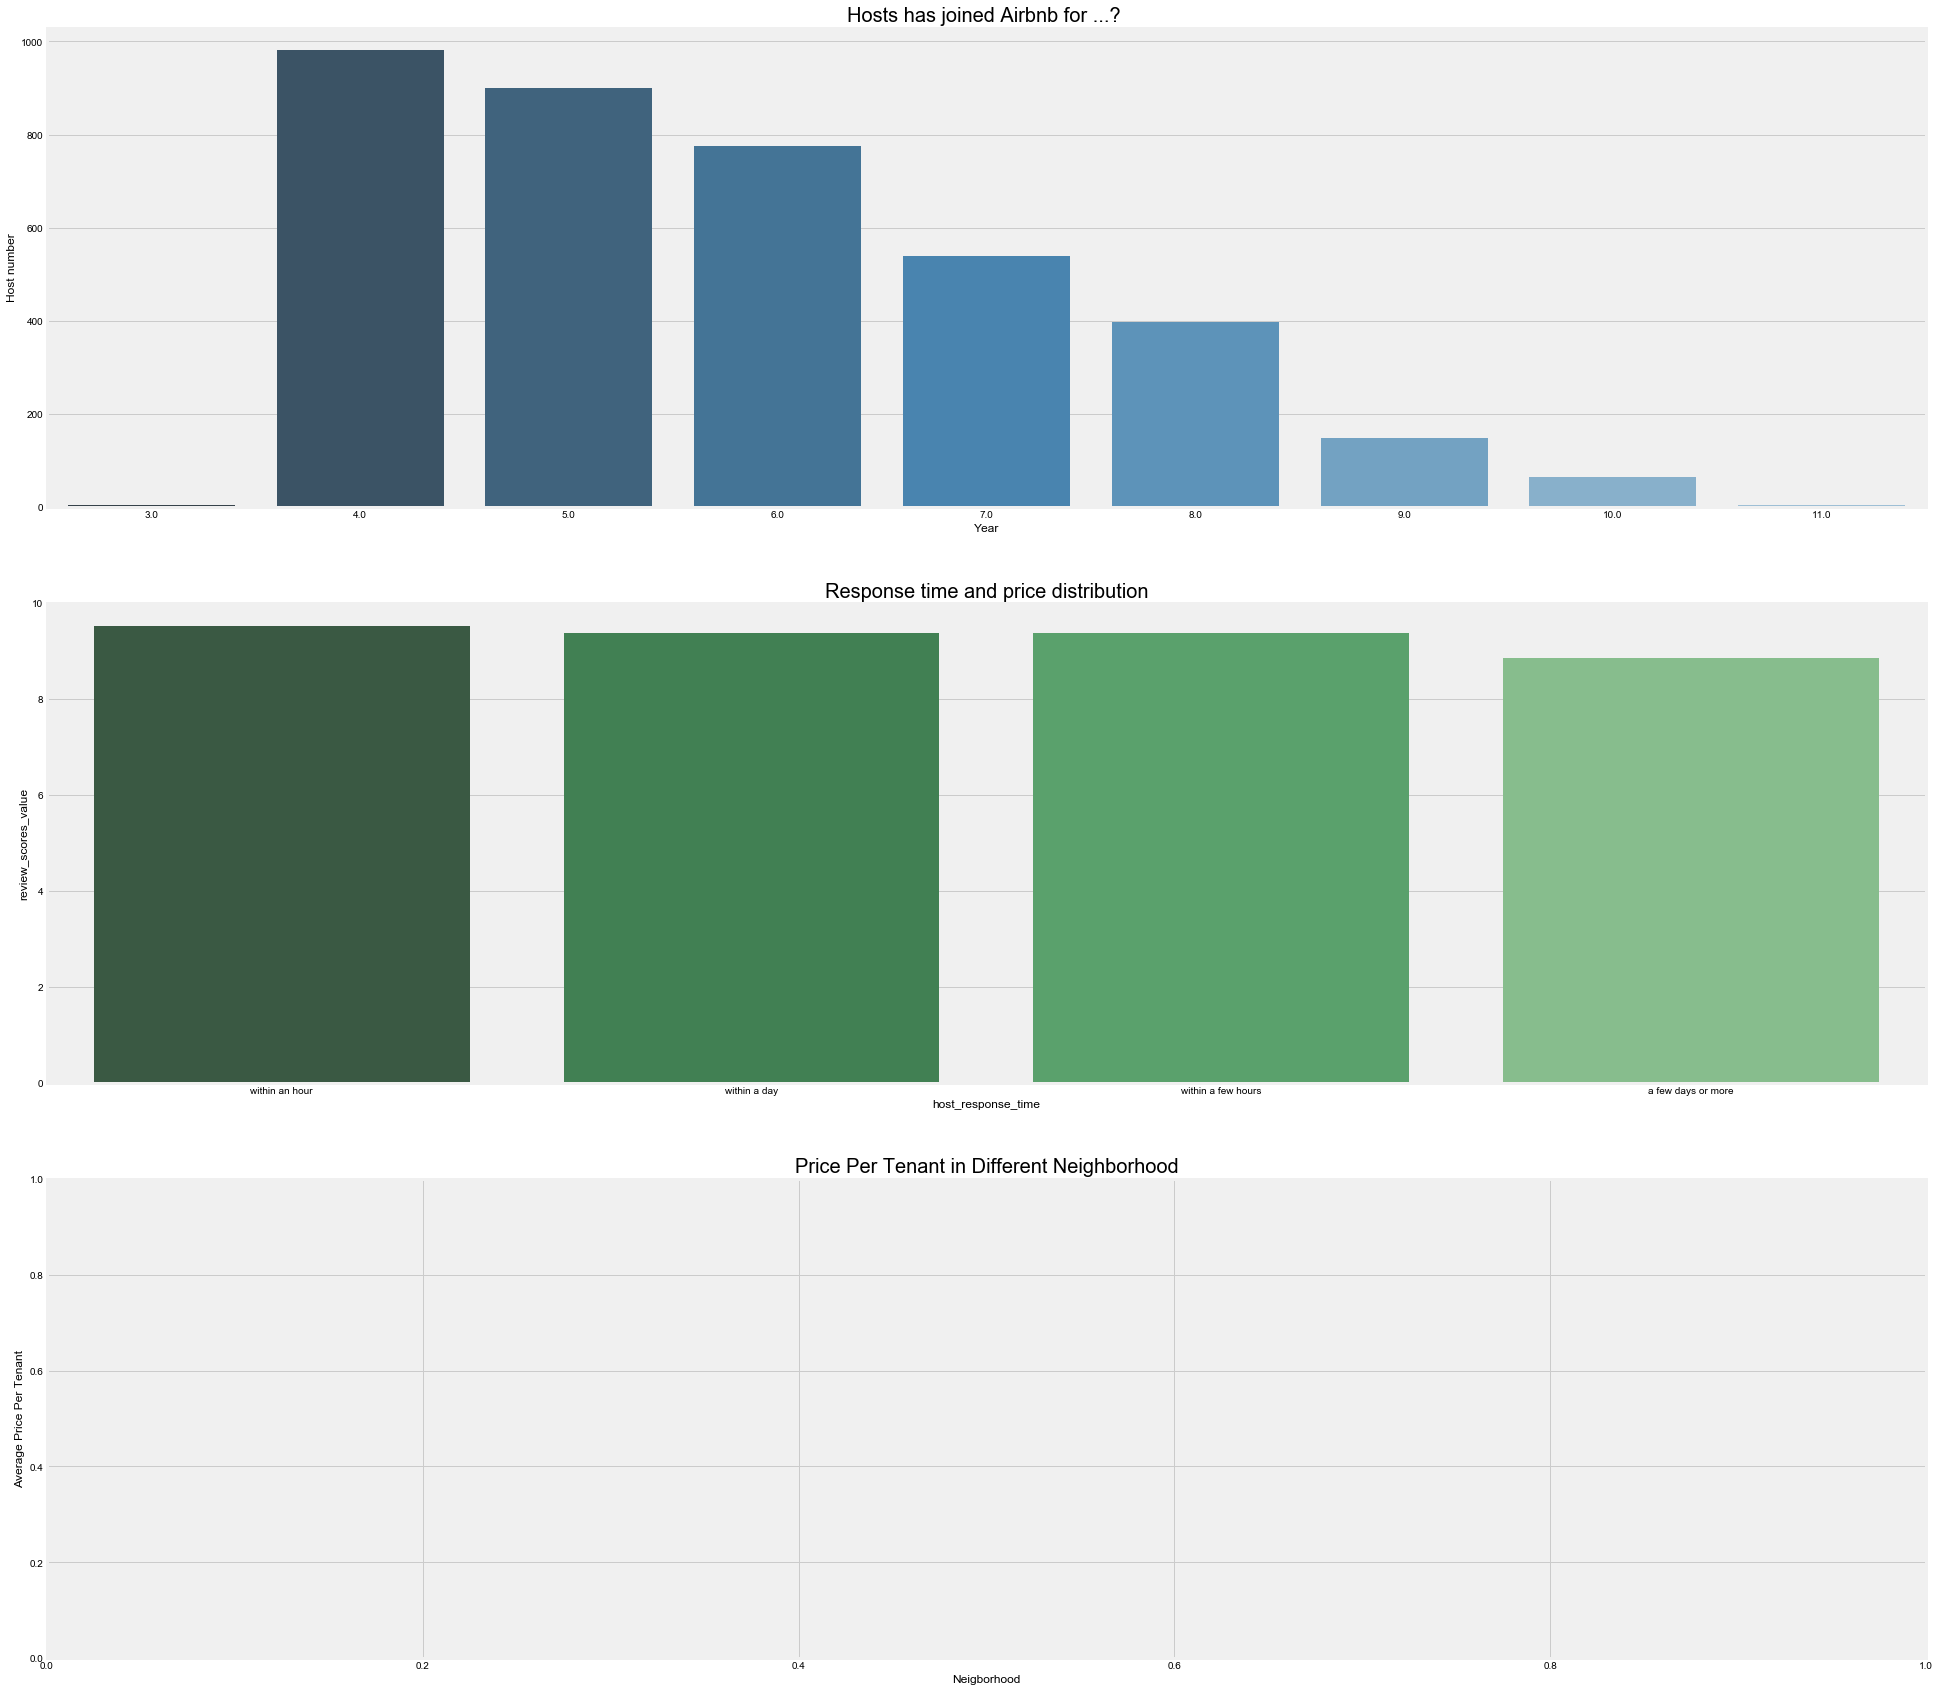

In [14]:
f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(30,30))
sns.barplot(x='host_since', y='id', palette="Blues_d", data=df_host_count, ax=ax1)
ax1.set_title('Hosts has joined Airbnb for ...? ',fontsize=20)
ax1.set_xlabel('Year')
ax1.set_ylabel('Host number')

sns.barplot(x='host_response_time', y='review_scores_value', palette="Greens_d", data=df_host_response, ax=ax2)
ax2.set_title("Response time and price distribution",fontsize=20)
ax3.set_title('Price Per Tenant in Different Neighborhood',fontsize=20)
ax3.set_xlabel('Neigborhood')
ax3.set_ylabel('Average Price Per Tenant')

plt.show()

# 2. Feature Selection: Explore the correlation between every variables

Thanks to our cleansed data after preparing data, in the analysis of correlation between every variables,
we will ignore those missing values. Besides, we will utilize the linear regression thus we have to delete all of
the discrete, sign or dummy variables.

In [20]:
input = ['id','host_since','host_response_rate','host_acceptance_rate','host_listings_count',
          'accommodates','bathrooms','bedrooms','beds','price','guests_included','extra_people',
           'number_of_reviews','review_scores_rating','review_scores_accuracy',
           'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
           'review_scores_location','review_scores_value','reviews_per_month']

In [21]:
input_data = data[input]
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 21 columns):
id                             3818 non-null int64
host_since                     3816 non-null float64
host_response_rate             3295 non-null object
host_acceptance_rate           3045 non-null object
host_listings_count            3816 non-null float64
accommodates                   3818 non-null int64
bathrooms                      3802 non-null float64
bedrooms                       3812 non-null float64
beds                           3817 non-null float64
price                          3818 non-null float64
guests_included                3818 non-null int64
extra_people                   3818 non-null object
number_of_reviews              3818 non-null int64
review_scores_rating           3171 non-null float64
review_scores_accuracy         3160 non-null float64
review_scores_cleanliness      3165 non-null float64
review_scores_checkin          3160 non-null float64
rev

In [45]:
# clean the data: turn the string data type to float
def percent(x):
    return (float(x[:-1]))

input_data['host_response_rate'].apply(percent)
input_data['host_acceptance_rate'].apply(percent)
input_data['extra_people'] = input_data['extra_people'].apply(lambda x: float(x[1:]))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [69]:
# handle the missing value, substitute the missing value with the mean value
input_data[input_data['host_since'].isnull() == True]
input_data['host_since'].mean()
input_data['host_since'] = input_data['host_since'].fillna(input_data['host_since'].mean())

# input_data['host_response_rate'].mean()
# input_data['host_response_rate'].fillna(input_data['host_response_rate'].mean())

# input_data['host_acceptance_rate'].mean()
# input_data['host_acceptance_rate'].fillna(input_data['host_acceptance_rate'].mean())

input_data['bathrooms'].mean()
input_data['bathrooms'] = input_data['bathrooms'].fillna(input_data['bathrooms'].mean())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [61]:
input_data.head(3)

,id,host_since,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,...,extra_people,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,241032,8.0,96%,100%,3.0,4,1.0,1.0,1.0,85.0,...,5.0,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,953595,6.0,98%,100%,6.0,4,1.0,1.0,1.0,150.0,...,0.0,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
2,3308979,5.0,67%,100%,2.0,11,4.5,5.0,7.0,975.0,...,25.0,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15


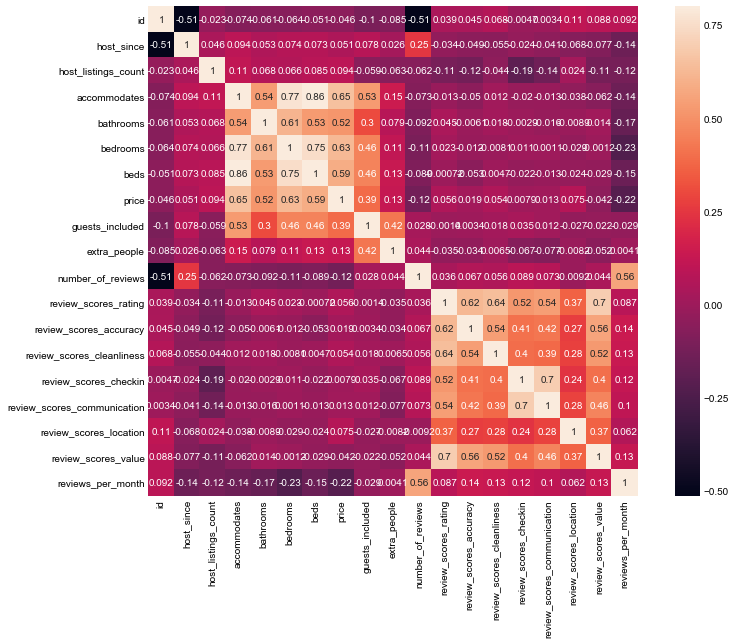

In [71]:
corrmat = input_data.corr()
f, ax = plt.subplots(figsize=(12, 9))


sns.heatmap(corrmat, vmax=.8, annot= True, square=True)

# 2.Basic Modelling & Evaluation

Define the cross validation evaluation metrics, we consider accommodates,bathrooms,bedrooms,beds,guest_included,extra_people as our features.

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
feature = ['accommodates', 'bathrooms','bedrooms','beds','guests_included','extra_people']
X = input_data[feature]
y = input_data['price']

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


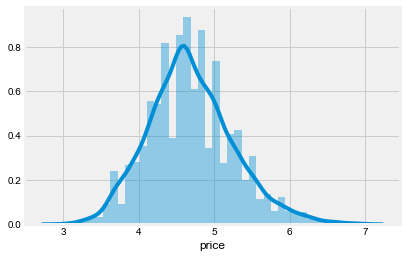

In [80]:
# 0.split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# 1.make it a normal distribution, thus log it.
y_train = np.log1p(y_train)
sns.distplot(y_train)

In [87]:
all_data = pd.concat(X_train,y_train)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

# 3. Model Validation

In [ ]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

# 4.A/B Testing Design

https://zhuanlan.zhihu.com/p/38622109